# LetsGrowMore #Oct2021

    Name     : Vishnu Nair
    Task 1   : Stock Market Prediction And Forecasting Using Stacked LSTM 
    Level    : Beginner
    Language : Python
    Software : Jupyter Notebook
    Dataset  : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv


# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Reading The Dataset 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [4]:
data.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# Data Sorting

In [5]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
df=data.sort_values(by='Date')
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78


In [7]:
df.reset_index(inplace=True)

In [8]:
df.head(10)

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
5,2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
6,2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
7,2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
8,2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
9,2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78


# Visualization

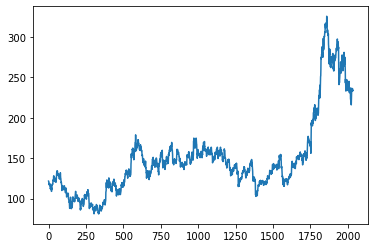

In [9]:
plt.plot(df['Close'])

In [10]:
dff=df['Close']
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

# Min Max Scalar

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Splitting the Dataset 

In [12]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

# Convert an array of values into a dataset matrix

In [13]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

# Splitting Data into Train and Test

In [14]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(1373, 50)
(1373,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(560, 50)
(560,)


(None, None)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating the LSTM Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(25,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(25,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 25)            2700      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 25)            5100      
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 12,926
Trainable params: 12,926
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_split=0.1,epochs=30,batch_size=64,verbose=1)

Epoch 1/30
20/20 [==============================] - 15s 265ms/step - loss: 0.0115 - val_loss: 0.0016
Epoch 2/30
20/20 [==============================] - 3s 151ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 3/30
20/20 [==============================] - 3s 150ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/30
20/20 [==============================] - 3s 151ms/step - loss: 9.1575e-04 - val_loss: 0.0012
Epoch 5/30
20/20 [==============================] - 3s 150ms/step - loss: 8.9587e-04 - val_loss: 0.0012
Epoch 6/30
20/20 [==============================] - 3s 150ms/step - loss: 8.5367e-04 - val_loss: 0.0011
Epoch 7/30
20/20 [==============================] - 3s 150ms/step - loss: 8.5880e-04 - val_loss: 0.0011
Epoch 8/30
20/20 [==============================] - 3s 152ms/step - loss: 8.2476e-04 - val_loss: 0.0011
Epoch 9/30
20/20 [==============================] - 3s 153ms/step - loss: 7.9878e-04 - val_loss: 0.0011
Epoch 10/30
20/20 [==============================] - 3s 150ms/step - loss: 

# Prediction And Checking Performance

In [21]:
test_predict=model.predict(X_test)

In [22]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[125.27338 ],
       [125.05054 ],
       [124.95119 ],
       [125.11445 ],
       [125.597916],
       [126.540085],
       [127.75404 ],
       [129.0301  ],
       [130.24097 ],
       [131.16086 ],
       [131.77211 ],
       [132.09094 ],
       [132.12758 ],
       [131.98805 ],
       [131.75725 ],
       [131.32664 ],
       [130.76254 ],
       [130.40329 ],
       [130.17508 ],
       [130.03015 ],
       [130.07109 ],
       [130.12381 ],
       [130.55185 ],
       [131.4994  ],
       [132.9498  ],
       [134.59537 ],
       [136.00847 ],
       [136.84587 ],
       [137.27757 ],
       [137.47112 ],
       [137.78564 ],
       [138.282   ],
       [138.51001 ],
       [138.38206 ],
       [137.94778 ],
       [137.41107 ],
       [136.86472 ],
       [136.46405 ],
       [136.40625 ],
       [136.45872 ],
       [136.62007 ],
       [136.89029 ],
       [137.23611 ],
       [137.56773 ],
       [137.78113 ],
       [137.95073 ],
       [138.0969  ],
       [138.2

# Calculating Performance

In [23]:
import math
from sklearn.metrics import mean_squared_error

In [24]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance


0.0925125412151422